# Terahertz conversion effeciency

Using a model that accounts for cascaded optical rectification, three-photon absorption of the near-infrared radiation, and material dispersion/absorption properties, we describe the Terahertz generation through optical rectification of near-infrared femtosecond pulses in DSTMS.

## Dispersion and absorption properties 

1. Using Lorentz model, we interpolate the refractive index of the nonlinear optical crystal (DSTMS) in the THz range. The oscillator parameters are based on the data extracted from "Montemezzani, G. et al. J. Opt. Soc. Am. B 32, 1078-1083 (2015)"

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import sys, os
sys.path.append(os.path.dirname(os.getcwd()))

from optical_rectification import definitions, par

# Parameters stored in par file
n_inf = par.param[0]; p = np.array(par.param[1:]); k = par.k;
w0 = p[:,0]; gam0 = p[:,1]; a0 = p[:,2];

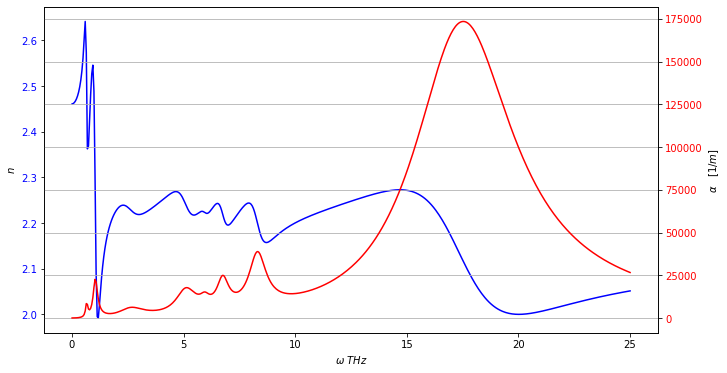

In [2]:
# Visualize refractive index in THz region
fig, ax1 = plt.subplots(figsize=(11, 6))

w = np.linspace(0.01, 25, 2**9)  # [THz]
dispersion = definitions.Index(w, w0, gam0, a0, n_inf, k);
n = dispersion.n()
alpha = dispersion.alpha()

ax1.plot(w, n, 'b')
ax1.set_xlabel(r'$\omega$ $THz$')
ax1.set_ylabel(r"$n$")
ax1.tick_params(axis='y',labelcolor='b')
ax2 = ax1.twinx()  # Create a second axes object that shares the same x-axis
ax2.plot(w, alpha, 'r')
ax2.set_ylabel(r"$\alpha \quad [1/m]$")
ax2.tick_params(axis='y',labelcolor='r')
plt.grid(True)

2. For the dispersion of the nonlinear crystal in the optical range, we simply use the measured data available in that range of interest; Reference Montemezzani, G. et al. J. Opt. Soc. Am. B 32, 1078-1083 (2015).

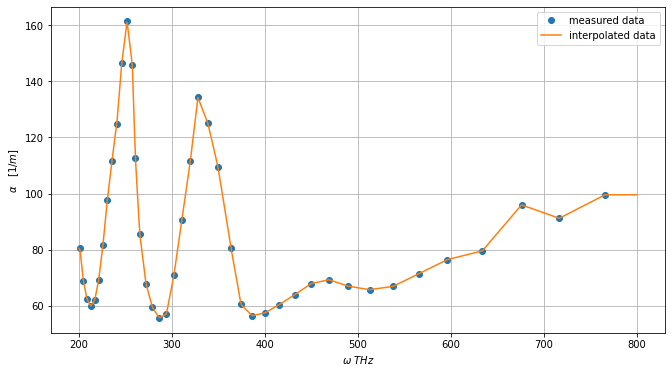

In [3]:
# Visualize refractive index in Optical region
fig, ax1 = plt.subplots(figsize=(11, 6))

s = definitions.Spectrum(par.fname_alpha_opt);
original_spec = s.read_spec();
opt_spec = s.opt_spec();
w_opt = np.linspace(200, 800, 2**9)  # [THz]
alpha_opt = np.interp(w_opt, opt_spec[:,0]*1e-12, opt_spec[:,1])  #[1/cm]

ax1.plot(opt_spec[:,0]*1e-12, opt_spec[:,1]*1e2, 'o', label='measured data')
ax1.plot(w_opt, alpha_opt*1e2, '-', label='interpolated data')
ax1.set_xlabel(r'$\omega$ $THz$')
ax1.set_ylabel(r"$\alpha \quad [1/m]$")
ax1.tick_params(axis='y',labelcolor='k')
ax1.legend()
plt.grid(True)